
## Donna Santos
Student No. 100362558

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

### Dataset


In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Check for Missing Data

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

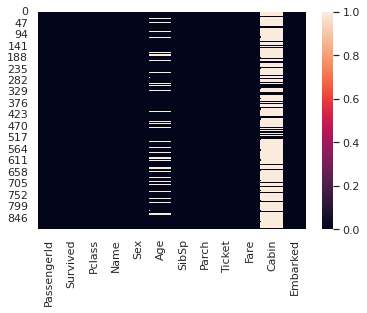

In [6]:
sns.heatmap(train_df.isnull())

## Analyze Variables

### SibSp Variable

In [7]:
SibSp_Alone = train_df[train_df['SibSp']==0]
SibSp_Alone.count()

PassengerId    608
Survived       608
Pclass         608
Name           608
Sex            608
Age            471
SibSp          608
Parch          608
Ticket         608
Fare           608
Cabin          126
Embarked       606
dtype: int64

There are 608 passengers which are considered alone.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


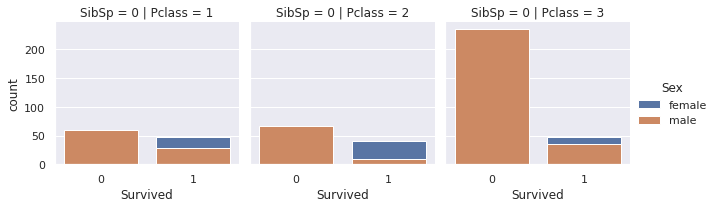

In [8]:
SibSp_Alone_fig = sns.FacetGrid(SibSp_Alone, col = "Pclass", row = "SibSp", hue = "Sex")
SibSp_Alone_fig = SibSp_Alone_fig.map(sns.countplot, 'Survived').add_legend()

In [10]:
train = train_df

In [11]:
SibSp_Family = train[train['SibSp'] != 0]
SibSp_Family.count()

PassengerId    283
Survived       283
Pclass         283
Name           283
Sex            283
Age            243
SibSp          283
Parch          283
Ticket         283
Fare           283
Cabin           78
Embarked       283
dtype: int64

There are 283 passengers which have family and or spouse onboard.

### Sex (Gender) Variable

Distribution of Survived based on Sex

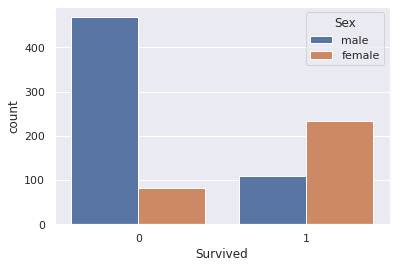

In [12]:
sns.countplot(x='Survived',hue='Sex',data=train)

Distribution of Survived based on Passenger Class

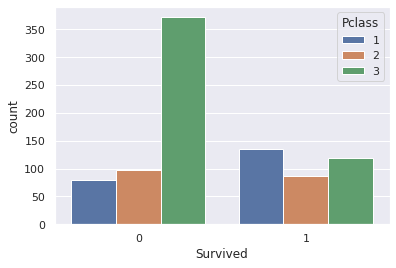

In [13]:
fig2 = sns.countplot(x= 'Survived', hue ='Pclass', data = train)

### Age Variable

Distribution of Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


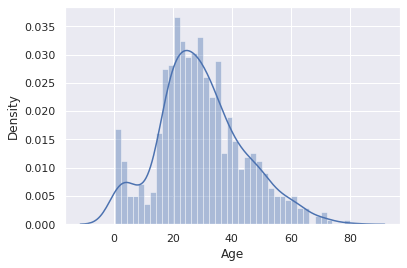

In [14]:
sns.distplot(train['Age'].dropna(), bins=40)

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

Now apply that function!

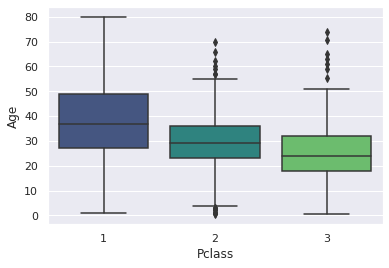

In [15]:
sns.boxplot(x="Pclass", y="Age", data=train_df,palette='viridis')

In [16]:
train_df.groupby("Pclass")['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [17]:
train_df.groupby(["Sex","Pclass"])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [18]:
train_df['Age'] = train_df['Age'].fillna(train_df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

### PLOT THE MISSING DATA FOR AGE 

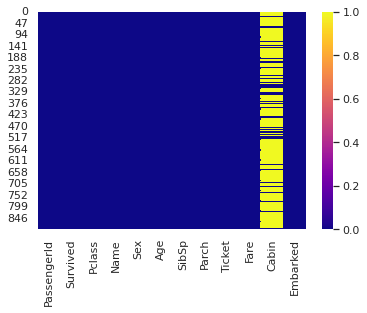

In [19]:
sns.heatmap(train_df.isnull(),cmap='plasma')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [20]:
train_df1 = train_df.drop('Cabin',axis=1,inplace=True)

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train_df.dropna(inplace=True)

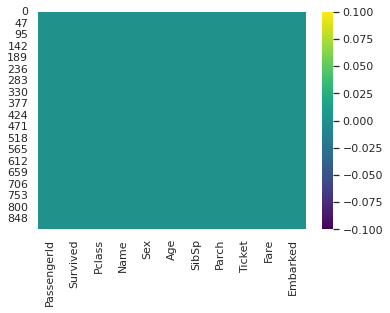

In [23]:
sns.heatmap(train_df.isnull(),cmap='viridis')

## Convert Categorical Features 


In [24]:
sex_male = pd.get_dummies(train_df['Sex'])
sex_male.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [25]:
sex_male= pd.get_dummies(train_df['Sex'],drop_first=True)
sex_male.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
embark_Q= pd.get_dummies(train_df['Embarked'],drop_first=True)
embark_Q.head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
train_df.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [28]:
train_df = pd.concat([train_df,sex_male,embark_Q],axis=1)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1



## Logistic Regression model


### Split the dataset

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Survived',axis=1), 
                                                    train_df['Survived'], 
                                                    test_size=0.35, 
                                                    random_state=101)

In [37]:
print("\n")
print("X_Train Shape: ",X_train.shape)
print("X_Test Shape: ",X_test.shape)
print("Y_Train Shape: ",y_train.shape)
print("Y_Test Shape: ",y_test.shape)



X_Train Shape:  (577, 8)
X_Test Shape:  (312, 8)
Y_Train Shape:  (577,)
Y_Test Shape:  (312,)


## Predict the model using Logistic Regression with Ridge Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.linear_model import SGDClassifier

In [33]:
log_reg_model = LogisticRegression(C=0.001, penalty="l2", max_iter=100)

In [34]:
log_reg_model.fit(X_train,y_train)

LogisticRegression(C=0.001)

In [35]:
log_reg_model = SGDClassifier(loss="log", penalty="l2", max_iter=5)

In [36]:
predict_Survived = log_reg_model.predict(X_test)

NotFittedError: ignored

In [ ]:
predict_Survived

## Visualize the Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predict_Survived)

In [ ]:
result_matrix = pd.crosstab(y_test, predict_Survived, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(result_matrix, annot=True)

In [ ]:
sum(np.abs(y_test-predict_Survived))

In [ ]:
data1 = {'y_test': y_test, 'y_hat': predict_Survived}
pd.DataFrame(data1)

## Model Performance Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predict_Survived))

## Cross Validation k=2

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import cross_val_score

scores_accuracy_2 = cross_val_score(log_reg_model, X_train, y_train, scoring='accuracy', cv=2)
scores_accuracy_2

## Cross Validation k=3

In [ ]:
scores_accuracy_3 = cross_val_score(log_reg_model, X_train, y_train, scoring='accuracy', cv=3)
scores_accuracy_3

## Cross Validation k=4

In [ ]:
scores_accuracy_4 = cross_val_score(log_reg_model, X_train, y_train, scoring='accuracy', cv=4)
scores_accuracy_4

## Cross Validation k=5

In [ ]:
scores_accuracy_5 = cross_val_score(log_reg_model, X_train, y_train, scoring='accuracy', cv=5)
scores_accuracy_5